# INSTALLING REQUIRED LIBRARIES

##### TWITTER SCRAPING

In [1]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 3.7 MB/s eta 0:00:00


##### TEXT SUMMARIZER

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 113.9 MB/s eta 0:00:00


In [3]:
!pip install torch==1.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 831.4/831.4 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.15.1+cu118 requires torch==2.0.0, but you have torch 1.9.0 which is incompatible.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 1.9.0 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.9.0 which is incompatible.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.9.0 which is incompatible.


In [4]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.2 MB/s eta 0:00:00


##### SENTIMENT ANALYSIS WITH FLAIR

In [5]:
!pip install flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 37.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 57.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

##### SENTIMENT ANALYSIS WITH VADER

In [6]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 11.7 MB/s eta 0:00:00


# IMPORTING REQUIRED LIBRARIES



##### TWITTER SCRAPING

In [7]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from time import sleep
from tqdm import tqdm

##### TEXT SUMMARIZATION

In [8]:
import torch
import tensorflow as tf
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config, AutoTokenizer

In [9]:
torch.__version__

'1.9.0+cu102'

##### SENTIMENT ANALYSIS USING FLAIR

In [10]:
from flair.models import TextClassifier
from flair.data import Sentence

In [11]:
import re

In [12]:
#Visualization 
import matplotlib.pyplot as plt
import numpy as np

##### SENTIMENT ANALYSIS WITH VADER

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# PROCESSING

##### TWITTER SCRAPING

In [14]:
def TwitterScraper(searchQuery):
  tweet_data = []
  number = 50
  for i, tweets in enumerate(sntwitter.TwitterSearchScraper('{}'.format(searchQuery)).get_items()):
    if i>number:
      break
    tweet_data.append([tweets.date, tweets.content, tweets.user.username, tweets.url])
  df = pd.DataFrame(tweet_data,columns=['Date','Tweets','Username','Url'])
  df.to_csv(f'{searchQuery}.csv',index=False,encoding='utf-8')
  tweetsDF = df['Tweets']
  return tweetsDF

SENTIMENT ANALYSIS WITH FLAIR

In [15]:
def sentiment_flair(query):
  # requires query to be in list format as input parameter
  query = query.tolist()
  classifier = TextClassifier.load('en-sentiment')
  outsflair=[]

  for i in query:
    sentence1 = Sentence(i)
    classifier.predict(sentence1)
    outsflair.append(sentence1.labels)
    
  return outsflair

In [16]:
def visualizeSentAna(tit,neg,pos):
  y = np.array([neg,pos])
  mylabels = ["Negative Reviews", "Positive Reviews"]
  mycolors = ["#FF495C", "#3DDC97"]

  plt.pie(y,labels=mylabels,
          colors=mycolors,
          autopct = '%1.2f%%',
          wedgeprops = {"edgecolor" : "black",
                        'linewidth': 2,
                        'antialiased': True})
  plt.title("Product Demand Analysis - Visualization\n" + tit, bbox={'facecolor':'#C4DCE9', 'pad':5})
  plt.show() 

In [17]:
def flair_sentiment_probs(inpQuery):
  outforflair = sentiment_flair(inpQuery)
  negCnt , posCnt = 0 , 0
  outf=[]
  for i in outforflair:
    # print(i[0])
    st = str(i[0])
    res = re.split(r"→ ",st)
    # print(res[1])
    res2 = re.split(r"\s",res[1])
    if res2[0] == 'NEGATIVE':
      negCnt = negCnt + 1
    elif res2[0] == 'POSITIVE':
      posCnt = posCnt + 1
  outf.append(negCnt)
  outf.append(posCnt)
  return outf
  # print(f"\nNegative reviews count : {negCnt} \nPositive reviews count : {posCnt}")

##### TEXT SUMMARIZER

In [18]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [19]:
def TextSummaryPreProcessing(inpDF):
  #Converting to a String for Summarization
  tweetSummary = ''
  for i in inpDF:
    tweetSummary = tweetSummary + i

  # print(f"\n\nBEFORE : \n{tweetSummary}")
  
  #Preprocessing the data - removing tags and urls
  #URL
  tweetSummary = re.sub(r'http\S+', '', tweetSummary, flags=re.MULTILINE)
  #Tags
  tweetSummary = re.sub(r'@\S+', '', tweetSummary, flags=re.MULTILINE)
  tweetSummary = re.sub(r'@', '', tweetSummary, flags=re.MULTILINE)
  tweetSummary = re.sub(r'#\S+', '', tweetSummary, flags=re.MULTILINE)
  tweetSummary = re.sub(r'#', '', tweetSummary, flags=re.MULTILINE)
  tweetSummary = re.sub(r':', '', tweetSummary, flags=re.MULTILINE)
  tweetSummary = re.sub(r'-', '', tweetSummary, flags=re.MULTILINE)
  # tweetSummary = re.sub(r')', '', tweetSummary, flags=re.MULTILINE)
  # tweetSummary = re.sub(r'(', '', tweetSummary, flags=re.MULTILINE)
  tweetSummary = remove_emojis(tweetSummary)

  # print(f"\n\nAFTER : \n{tweetSummary}")
  return tweetSummary

In [20]:
def text_summerizer(InpData):
  #Preprocess
  iptext = TextSummaryPreProcessing(InpData)
  # Initialize the pretrained model
  model = T5ForConditionalGeneration.from_pretrained('t5-small') # t5-small --> model name
  tokenizer = AutoTokenizer.from_pretrained('t5-small')
  device = torch.device('cpu')

  # Preprocess the input text
  preprocessed_text = iptext.strip().replace('\n','')
  t5_input_text = 'Summarize: ' + preprocessed_text
  t5_input_text

  # Word length of input text
  len(t5_input_text.split())

  # Tokenizing each word 
  tokenized_text = tokenizer.encode(t5_input_text, return_tensors='pt', max_length=512).to(device)

  summary_ids = model.generate(tokenized_text, min_length=120, max_length=512)
  summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
  # print(f"\n\nSummary of Public Opinion : \n{summary}")
  return summary

##### FINAL OUTPUT

In [21]:
def ProductAnalysisFunc():
  sQuery = input("Enter the product name : ")
  query = TwitterScraper(sQuery)
  # print(type(query))
  # print(query)
  sentAn = flair_sentiment_probs(query)
  textSum = text_summerizer(query)
  print("\n\n\n\n\n")
  visualizeSentAna(sQuery,sentAn[0],sentAn[1])
  print(f"\nNegative reviews count : {sentAn[0]} \nPositive reviews count : {sentAn[1]}")
  print(f"\n\nSummary of Public Opinion : \n{textSum}")
  



  # querySummary = text_summerizer(query)
  # print(querySummary)

  # sentiment_flair() function requires query to be in list format as input parameter
  # query = query.tolist()

  # outforflair = sentiment_flair(query)
  # print(f"\n\nSENTIMENT ANALYSIS OUTPUT")
  # flair_sentiment_probs(outforflair)
  # flair_sentiment_probs(sQuery,query)

# OUTPUT

Enter the product name : boat earphones


<ipython-input-14-f24f0d4791a7>:7: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweet_data.append([tweets.date, tweets.content, tweets.user.username, tweets.url])


2023-04-12 17:55:43,816 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpogpz6f8g


100%|██████████| 253M/253M [00:11<00:00, 22.6MB/s]

2023-04-12 17:55:55,937 copying /tmp/tmpogpz6f8g to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2023-04-12 17:55:56,704 removing temp file /tmp/tmpogpz6f8g


/usr/local/lib/python3.9/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


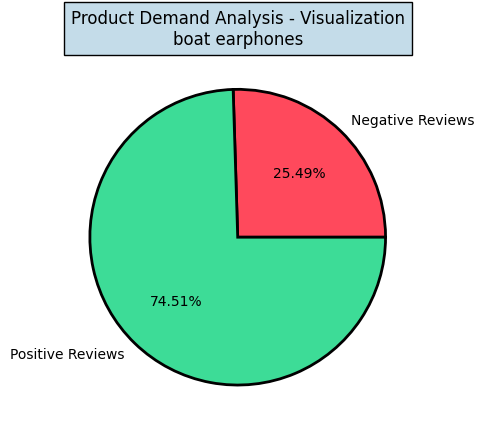


Negative reviews count : 13 
Positive reviews count : 38


Summary of Public Opinion : 
: I ordered boat earphones which are not working and refuses to take responsibilityboAt Rockerz 255F Sports Wireless in Ear Earphones TAGG Verve Max II 1.83” Biggest Display Smartwatch with Metal Body At Rs.899*Apply Rs.100 Off Coupon Exclusive For Prime Members.boAt Rockerz 255F Sports Wireless in Ear Earphones with Mic, Super Extra Bass, IPX5 Water &amp; Sweat Resistance and...I.


In [22]:
ProductAnalysisFunc()

Enter the product name : fastrack watches


<ipython-input-14-f24f0d4791a7>:7: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweet_data.append([tweets.date, tweets.content, tweets.user.username, tweets.url])
/usr/local/lib/python3.9/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


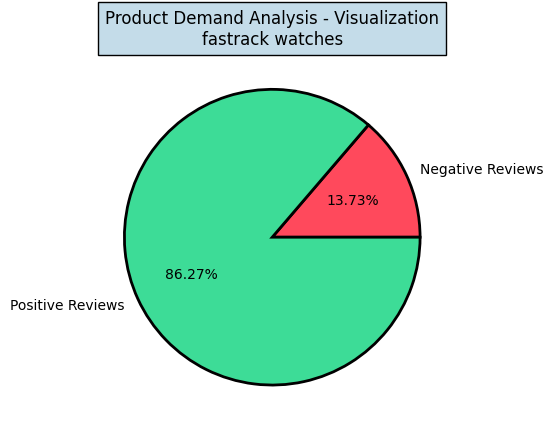


Negative reviews count : 7 
Positive reviews count : 44


Summary of Public Opinion : 
a a v5.3|Builtin Alexa|Mega 10 Day Battery|ATS Chipset with Zero Lag|100+ Sports Modes|150+ Watchfaces Check this out! Bought Reflex play smart watch which couldn't work even a month. Later service center gave me replacement voucher and now that voucher is useless since their system is not accepting that...................


In [23]:
ProductAnalysisFunc()

Enter the product name : mamaearth lotion


<ipython-input-14-f24f0d4791a7>:7: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweet_data.append([tweets.date, tweets.content, tweets.user.username, tweets.url])
/usr/local/lib/python3.9/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


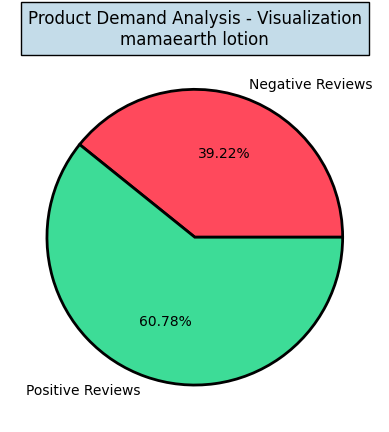


Negative reviews count : 20 
Positive reviews count : 31


Summary of Public Opinion : 
Moisturizing Lotion for Babies, 400ml ComboPay only 383.00Mamaearth Coco Soft Body Lotion with Coconut Milk &amp; Turmeric for 12Hour Long Stay 03 Nude Glow 30 ml Dewy Finish Mamaearth Honey Malai Body Lotion for healthier skin and anourished glow! Mamaearth Honey Malai Body Lotion for babygirls, for 24Hour Moisturization 400mlPay only 292.1.1.


In [25]:
ProductAnalysisFunc()

Enter the product name : american tourister bags


<ipython-input-14-f24f0d4791a7>:7: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweet_data.append([tweets.date, tweets.content, tweets.user.username, tweets.url])
/usr/local/lib/python3.9/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


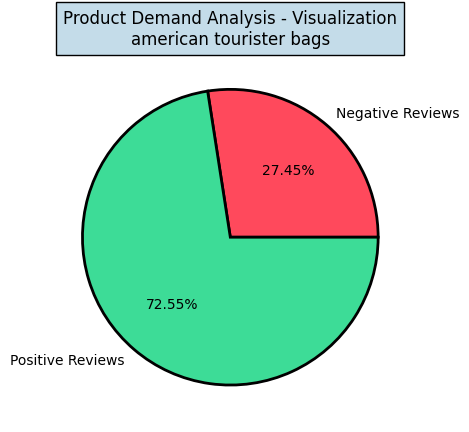


Negative reviews count : 14 
Positive reviews count : 37


Summary of Public Opinion : 
SCH BAG 02 BLACK) Tourister 32 Ltrs Black Casual Backpack (AMT FIZZ SCH BAG 02 BLACK) Tourister 32 Ltrs Black Casual Backpack (AMT FIZZ SCH BAG 02 BLACK) Tourister 32 Ltrs Black Casual Backpack (AMT FIZZ SCH BAG 02 BLACK) Tourister 32 Ltrs Black Casual Backpack (AMT FIZZ SCH BAG 02 BLACK) Tourister 32 Ltrs Black Casual......


In [26]:
ProductAnalysisFunc()

Enter the product name : adidas shoes


<ipython-input-14-f24f0d4791a7>:7: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweet_data.append([tweets.date, tweets.content, tweets.user.username, tweets.url])
/usr/local/lib/python3.9/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


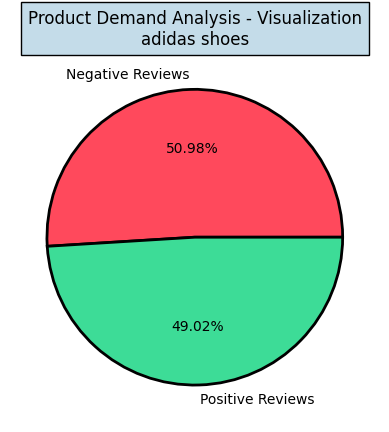


Negative reviews count : 26 
Positive reviews count : 25


Summary of Public Opinion : 
adidas adidas shoes shoes 5.0 DNA Sneakers Size 8.5 US Color Black NWB eBay Campus 00S Shoes + H03472 on Adidas GB. adidas shoes adidas adidas adidas a shoesS Shoes + H03472 on Adidas GB. I miss owning Adidas Save Up to 70% On Adidas Golf Shoes, Hats, and Polos for Looking Good on the Green Sie etwas, bevor die Preise wieder steigen. adidas Men's Hoops 3.0 Mid...


In [28]:
ProductAnalysisFunc()